In [3]:
import sys, os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [4]:
try:
    sys.path.append('/home/piotr/CodeProjects/MhcEvo2000/PyScripts/')
except:
    sys.path.append('/home/piotr/CodeProjects/mhcevolution/PyScripts/')
import sex_selection_on_MHC_numb as ssmn

In [5]:
cd /media/piotr/Elements/MHC_UAM/sexSelectNew/

/media/piotr/Elements/MHC_UAM/sexSelectNew


In [6]:
df_1 = pd.read_csv("/media/piotr/Elements/MHC_UAM/sexSelectNew/Integr_reduc_1e5.csv")
df_5 = pd.read_csv("/media/piotr/Elements/MHC_UAM/sexSelectNew/Integr_reduc_5e5.csv")

In [7]:
df_1.dtypes

patho_spp       int64
SEXSELECT      object
meanAllel     float64
stdAllel      float64
slope         float64
indvMean      float64
indvSTD       float64
meanFitt      float64
meanCvFitt    float64
meanPatho     float64
stdPato       float64
dtype: object

In [8]:
ax_label = 26
T_label = 30
TicksFS = 24

In [9]:
myPallt = ["#6ACC65", "#4878CF", "#D65F5F", "#B47CC7", "#C4AD66", "#77BEDB"]
palDct = {"4": myPallt[0], "8": myPallt[1], "16": myPallt[2]}

def plotBox(what, df, patho_mut, ymaxx=None, legd=True, mPlt=myPallt):
    """Fast plot of what we want"""
    ax = sns.boxplot(x="SEXSELECT", y=what, hue="patho_spp", data=df, palette=mPlt)
    ax.legend_.remove()
    if legd:
        plt.legend(title="Patho. spp.",title_fontsize=TicksFS-4, fontsize=TicksFS-2, loc=2, edgecolor='white')
    #plt.xlabel("sexual selection mode",fontsize=ax_label)
    plt.xticks(fontsize=TicksFS)
    plt.yticks(fontsize=TicksFS)
    plt.xlabel(None)
    plt.ylabel(None)
    plt.grid(True, axis="y")
    if ymaxx:
        plt.ylim((0, ymaxx))
    #plt.tight_layout()
    #plt.savefig(str(patho_mut) + "." + what + ".png")
    #plt.show()

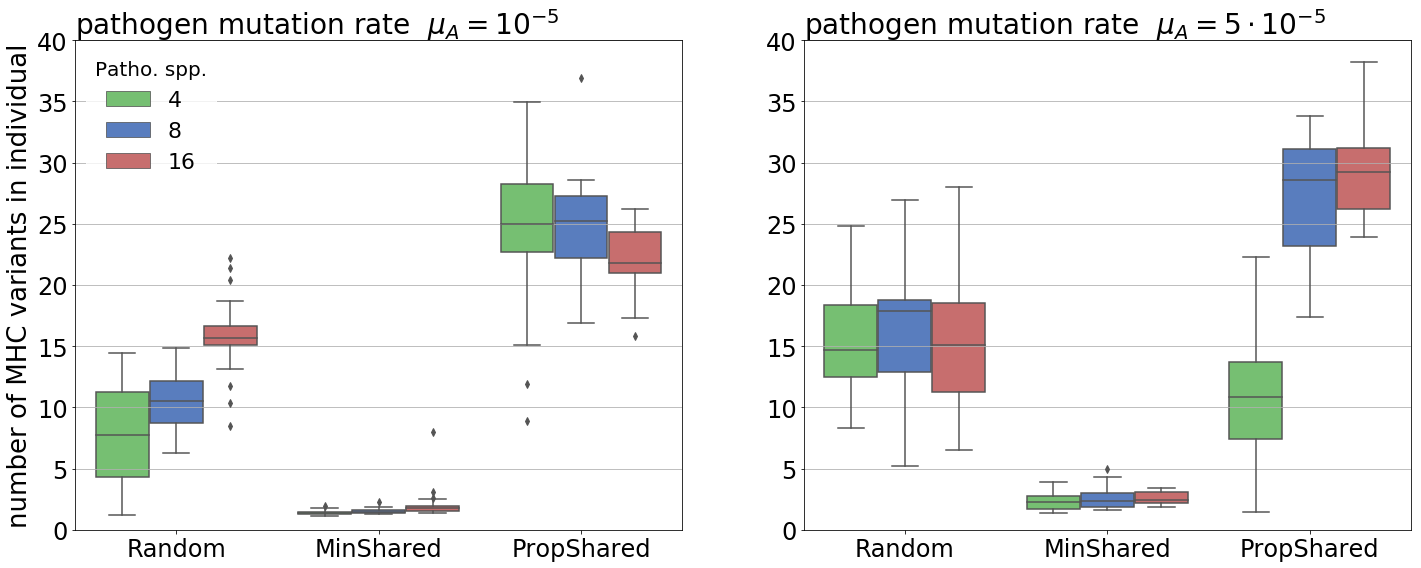

In [10]:
plt.figure(figsize=(20,8))

patho_mut = 0.00001
plt.subplot(121)
what = "indvMean"
plotBox(what, df_1, patho_mut, 40, True)
plt.title("pathogen mutation rate  $\mu_{A} = 10^{-5}$", loc='left', fontsize=ax_label+2)
plt.ylabel("number of MHC variants in individual", fontsize=ax_label)
"""
plt.subplot(222)
what = "meanAllel"
plotBox(what, df_1, patho_mut, 140, False)
#plt.ylabel("number of MHC variants in population", fontsize=ax_label)

plt.subplot(222)
what = "meanPatho"
plotBox(what, df_1, patho_mut, 0.5, False)
#plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label)
"""
patho_mut = 0.00005
plt.subplot(122)
what = "indvMean"
plotBox(what, df_5, patho_mut, 40, False)
plt.title("pathogen mutation rate  $\mu_{A} = 5 \cdot 10^{-5}$", loc='left', fontsize=ax_label+2)
#plt.ylabel("            number of MHC variants in individual", fontsize=ax_label, horizontalalignment='left')
"""
plt.subplot(224)
what = "meanAllel"
plotBox(what, df_5, patho_mut, 140, False)
plt.ylabel("        number of MHC variants in population", fontsize=ax_label, horizontalalignment='left')

plt.subplot(224)
what = "meanPatho"
plotBox(what, df_5, patho_mut, 0.5, False)
plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label, horizontalalignment='left')
"""
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("sexSelectCompr.png")
plt.show()

In [11]:
def justPlotDeviantFromMeanFather(ww, deltas, bSize, clr, xl=(0, 70), yl=(-20, 10)):
    """Does the same as `plotDeviantFromMeanFather()` only it does not
    calculate the stats on it self."""
    FS = 26
    bSize = np.sqrt(bSize)  # Create marker list
    plt.scatter(ww, deltas, s=bSize, color=clr)
    ll = np.linspace(xl[0], xl[1], 30)
    plt.plot(ll, np.zeros(len(ll)), 'k-', lw=3)
    plt.grid(axis='y')
    #plt.xlabel("Number of MHC types in 'mothers'", fontsize=FS)
    #plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from" +
    #           " pre-mating population", fontsize=FS)
    plt.xlim(xl)
    plt.ylim(yl)
    plt.xticks(size=FS-2)
    plt.yticks(size=FS-2)
    plt.tight_layout()

#### The line below decides what number of pathogen species is interesting. Choice is: **4, 8, 16**

In [34]:
spp = str(16)

In [35]:
minShr = ssmn.avgDatOut(np.load("./minShared_1e5/sexSelectStrgt_" + spp + "_minShr_1e5.npy"))
minShr5e5 = ssmn.avgDatOut(np.load("./minShared_5e5/sexSelectStrgt_" + spp + "_minShr_5e5.npy"))
optimAlpha = ssmn.avgDatOut(np.load("./optimAlpha_1e5/sexSelectStrgt_" + spp + "_optimAlpha_1e5.npy"))
optimAlpha5e5 = ssmn.avgDatOut(np.load("./optimAlpha_5e5/sexSelectStrgt_" + spp + "_optimAlpha_5e5.npy"))
optNoAlpha = ssmn.avgDatOut(np.load("./optimNoAlpha_1e1/sexSelectStrgt_" + spp + "_optNoAlpha_1e5.npy"))
optNoAlpha5e5 = ssmn.avgDatOut(np.load("./optimNoAlpha_5e5/sexSelectStrgt_" + spp + "_optNoAlpha_5e5.npy"))

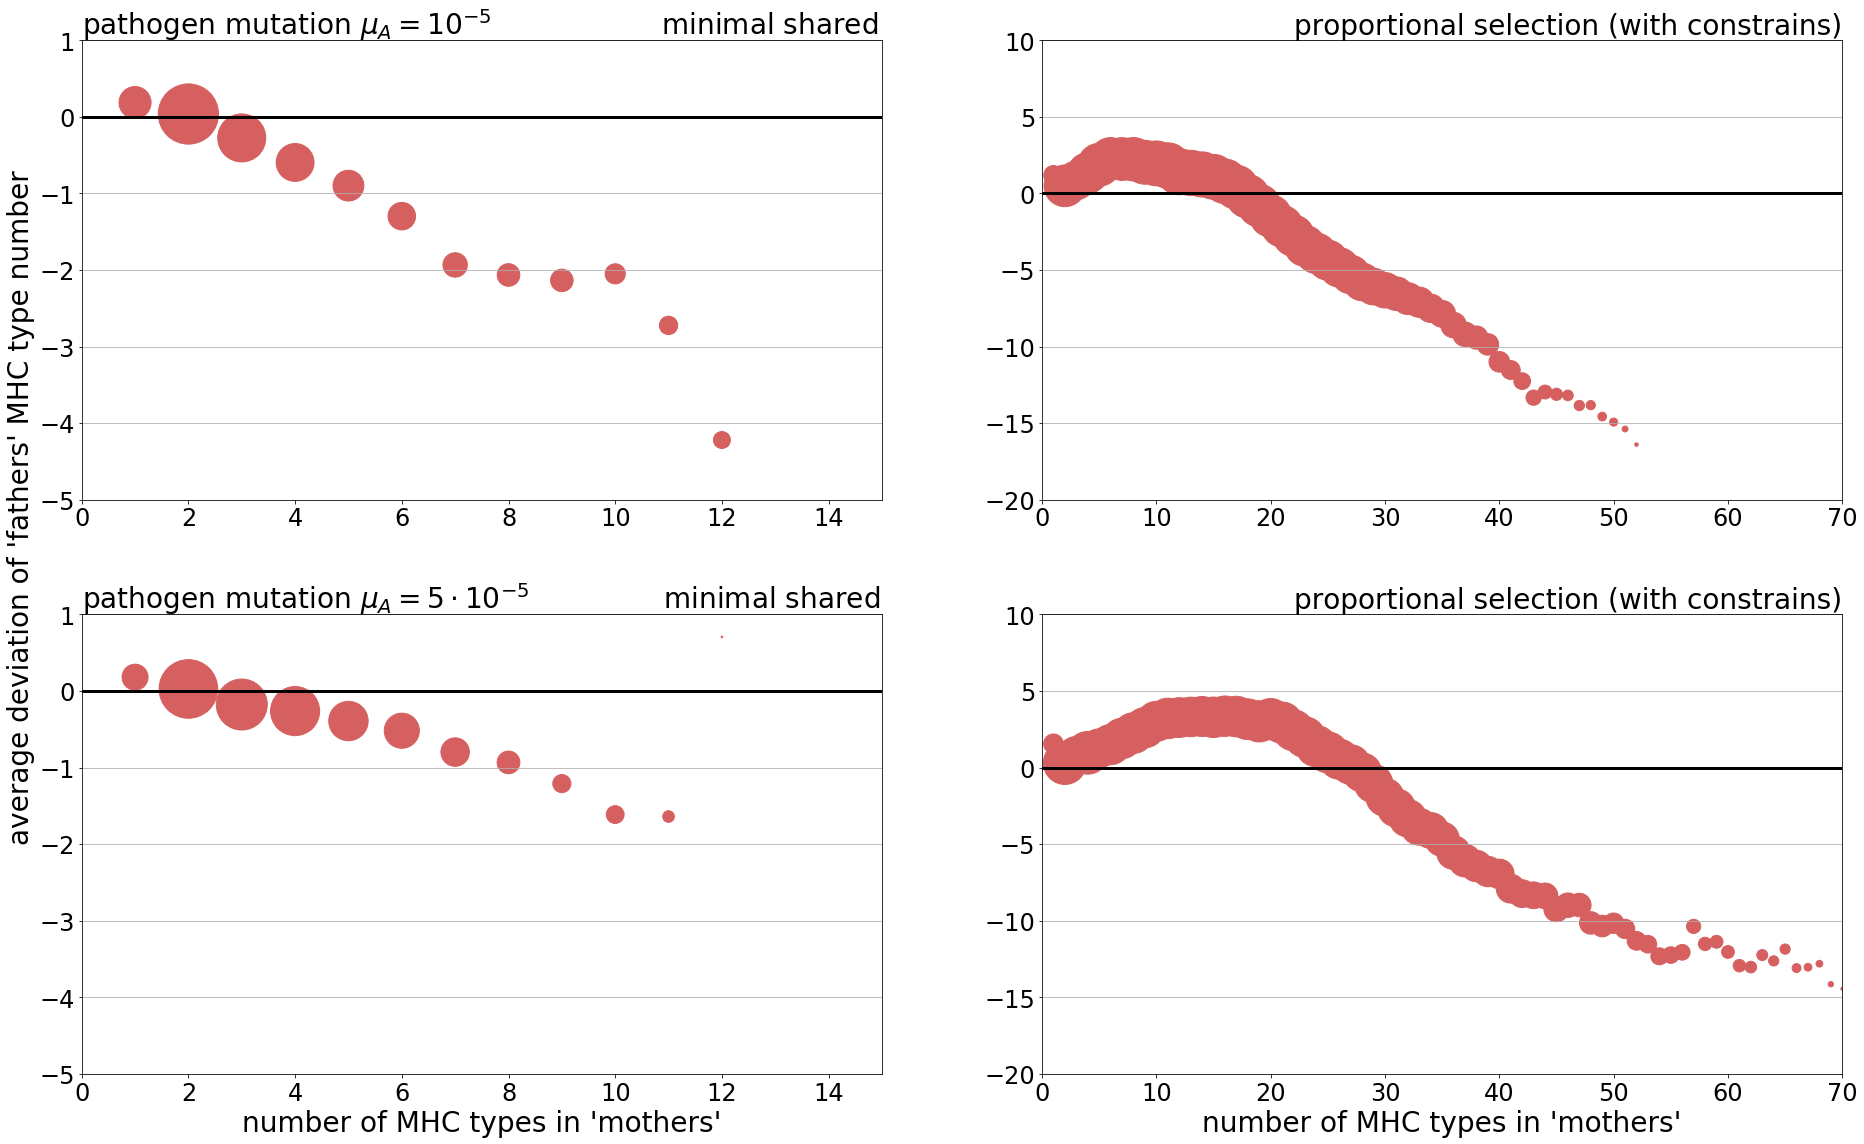

In [36]:
FS = 28
colr = palDct[spp]
plt.figure(figsize=(26,16))
plt.title("Number of pathogen spesies ")
plt.subplot(221)
justPlotDeviantFromMeanFather(minShr[:, 0], minShr[:, 1], minShr[:, 2], colr, (0,15), (-5,1))
plt.title("pathogen mutation $\mu_{A} = 10^{-5}$                   minimal shared", 
          loc='left', fontsize=ax_label+2)
#plt.xlabel("Number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)
plt.subplot(222)
justPlotDeviantFromMeanFather(optimAlpha[:, 0], optimAlpha[:, 1], optimAlpha[:, 2], colr)
plt.title("proportional selection (with constrains)", loc='right', fontsize=ax_label+2)
#plt.xlabel("Number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)
"""
plt.subplot(233)
justPlotDeviantFromMeanFather(optNoAlpha[:, 0], optNoAlpha[:, 1], optNoAlpha[:, 2], colr)
plt.title("optimal selection without constrains", loc='right', fontsize=ax_label+2)
#plt.xlabel("Number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)
"""
plt.subplot(223)
justPlotDeviantFromMeanFather(minShr5e5[:, 0], minShr5e5[:, 1], minShr5e5[:, 2], colr, (0,15), (-5,1))
plt.title("pathogen mutation $\mu_{A} = 5 \cdot 10^{-5}$               minimal shared",
          loc='left', fontsize=ax_label+2)
plt.xlabel("number of MHC types in 'mothers'", fontsize=FS)
plt.ylabel("average deviation of 'fathers' MHC type number", fontsize=FS, horizontalalignment='left')
plt.subplot(224)
justPlotDeviantFromMeanFather(optimAlpha5e5[:, 0], optimAlpha5e5[:, 1], optimAlpha5e5[:, 2], colr)
plt.title("proportional selection (with constrains)", loc='right', fontsize=ax_label+2)
plt.xlabel("number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)
"""
plt.subplot(236)
justPlotDeviantFromMeanFather(optNoAlpha5e5[:, 0], optNoAlpha5e5[:, 1], optNoAlpha5e5[:, 2], colr)
plt.title("optimal selection without constrains", loc='right', fontsize=ax_label+2)
plt.xlabel("number of MHC types in 'mothers'", fontsize=FS)
#plt.ylabel("Average deviation of 'fathers' MHC type\nnumber from pre-mating population", fontsize=FS)
"""
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
strr = "SexSelectStrght_" + spp + "_pat_spp.png"
plt.savefig(strr)
plt.show()

In [37]:
hdr = "SEXSELECT T_mut patho_spp MHC_in_mother father_deviant number_of_cases"
np.savetxt("sexSelectStrgt_" + spp + "_minShr_1e5.dat", minShr, 
           fmt='MinShared {:.5f} {} %d %.7f %d'.format(1e-5, spp), header=hdr)
np.savetxt("sexSelectStrgt_" + spp + "_minShr_5e5.dat", minShr5e5, 
           fmt='MinShared {:.5f} {} %d %.7f %d'.format(5e-5, spp), header=hdr)
np.savetxt("sexSelectStrgt_" + spp + "_optimAlpha_1e5.dat", optimAlpha, 
           fmt='PropShared {:.5f} {} %d %.7f %d'.format(1e-5, spp), header=hdr) 
np.savetxt("sexSelectStrgt_" + spp + "_optimAlpha_5e5.dat", optimAlpha5e5, 
           fmt='PropShared {:.5f} {} %d %.7f %d'.format(5e-5, spp), header=hdr)
np.savetxt("sexSelectStrgt_" + spp + "_optNoAlpha_1e5.dat", optNoAlpha, 
           fmt='PropSheredUnc {:.5f} {} %d %.7f %d'.format(1e-5, spp), header=hdr)
np.savetxt("sexSelectStrgt_" + spp + "_optNoAlpha_5e5.dat", optNoAlpha5e5, 
           fmt='PropSheredUnc {:.5f} {} %d %.7f %d'.format(5e-5, spp), header=hdr)

In [38]:
def linr(a, b, x):
    return a*x + b

def plotINVvsPresPatho(subArr, spp, titl='', fn=1):
    """ """
    ax_label = 18
    T_label = 20
    TicksFS = 16
    slp, inter, r_val, p_val, std_err = linregress(subArr['indvMean'], subArr['meanPatho'])
    xmax = np.max(subArr['indvMean'])
    imin = np.min(subArr['indvMean'])
    ymax = np.max(subArr['meanPatho']) 
    xyLin = np.linspace(imin, xmax, 50)
    #plt.figure(fn, figsize=(12,8))
    plt.scatter(subArr['indvMean'], subArr['meanPatho'], c=palDct[str(spp)])
    plt.plot(xyLin, linr(slp, inter, xyLin), "--", lw=2, c=palDct[str(spp)])
    plt.annotate(r'$R = $ {:.2f}'.format(r_val), (0.01*xmax, 0.95 * ymax), fontsize=T_label)
    plt.annotate(r'$p = $ {:.2e}'.format(p_val), (0.01*xmax, 0.85 * ymax), fontsize=T_label)
    plt.grid(True)
    plt.xlim(left=0)
    plt.ylim(bottom=0)
    plt.xlabel("number of MHC variants in individual", fontsize=ax_label)
    plt.ylabel("mean normalised number of presented pathogens", fontsize=ax_label)
    plt.xticks(fontsize=TicksFS)
    plt.yticks(fontsize=TicksFS)
    plt.title(titl + " ; patho spp. = " + str(spp), fontsize=T_label, horizontalalignment='right')
    #plt.savefig("INV_vs_Patho_" + str(fn) + "_.png")

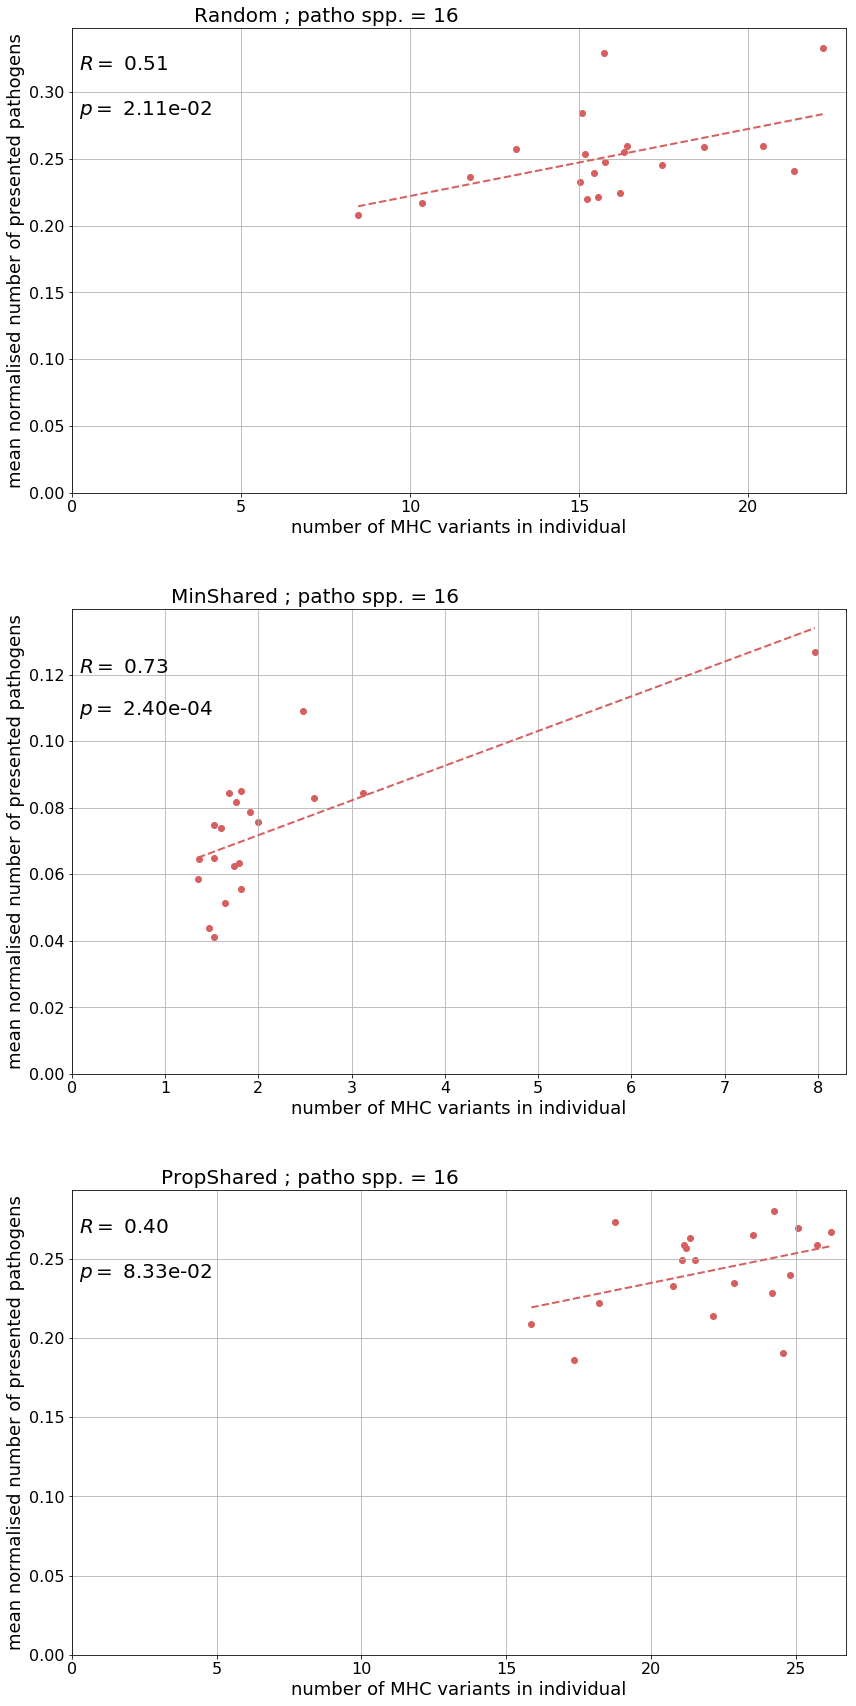

In [39]:
#scenario = np.unique(df_1['SEXSELECT'])
scenario = ['Random', 'MinShared', 'PropShared']
plt.figure(figsize=(12,24))
for ii, itm in enumerate(scenario):
    plt.subplot(3,1,ii+1)
    subArr = df_1[(df_1['SEXSELECT'] == itm) & (df_1['patho_spp'] == float(spp))]
    plotINVvsPresPatho(subArr, spp, itm, ii+1)
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("INV_vs_Patho_1e5_" + str(spp) + "_.png")

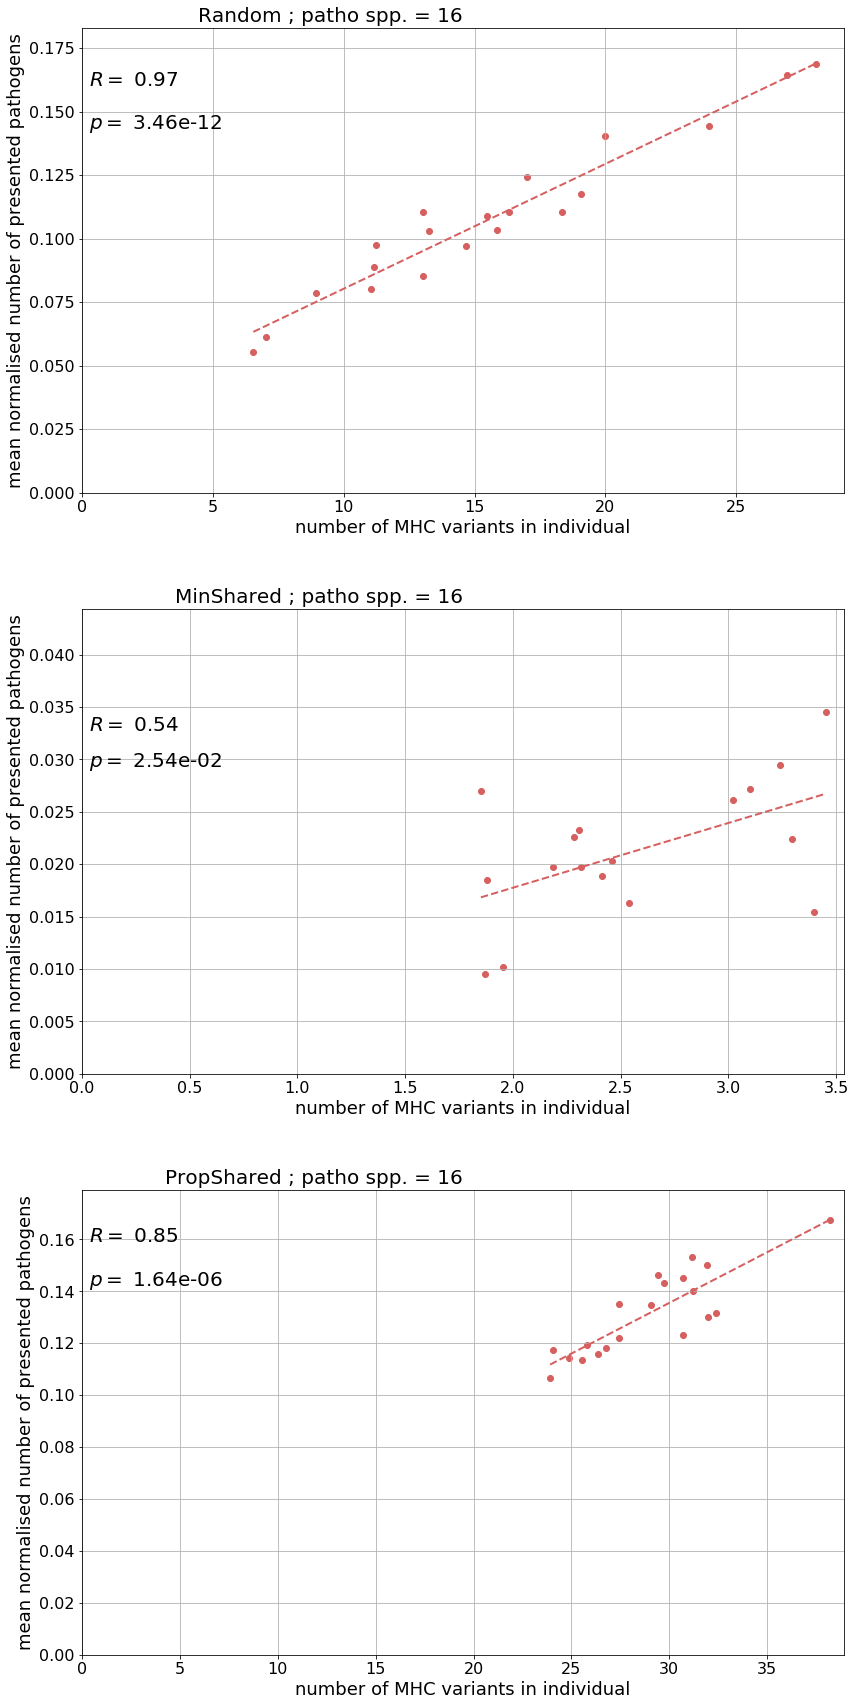

In [40]:
#scenario = np.unique(df_1['SEXSELECT'])
scenario = ['Random', 'MinShared', 'PropShared']
plt.figure(figsize=(12,24))
for ii, itm in enumerate(scenario):
    plt.subplot(3,1,ii+1)
    subArr = df_5[(df_5['SEXSELECT'] == itm) & (df_5['patho_spp'] == float(spp))]
    plotINVvsPresPatho(subArr, spp, itm, ii+1)
plt.tight_layout()
plt.subplots_adjust(hspace=0.25, wspace=0.2)
plt.savefig("INV_vs_Patho_5e5_" + str(spp) + "_.png")